In [72]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import seaborn as sns
import platform
import scipy.stats as stats

In [73]:
# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

### 예시 1 - 학생 키에 대한 두 집단 비교

In [79]:
# 데이터 생성
# 최소값 157 - 최대값 178 까지의 범위중에 size 20개 생성
group01Heights = np.random.randint(low=157, high=178, size=20)
print('첫번째 그룹=', group_01_Height)
      
group02Heights = np.random.randint(low=162, high=182, size=20)
print('두번째 그룹=', group_02_Height)      

첫번째 그룹= [176 173 163 171 177 164 168 164 158 168 162 175 177 174 169 175 174 158
 176 169]
두번째 그룹= [171 178 179 165 165 173 169 171 164 165 173 165 181 168 171 176 168 181
 168 174]


In [89]:
# 검증하기
# 첫번째 그룹 : 기준집단
# 두번째 그룹 : 관측집단
tResult = stats.ttest_ind(group01Heights, group02Heights)

print('한 집단 평균 검정(단일 표본검정) =', tResult)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(tResult))

한 집단 평균 검정(단일 표본검정) = Ttest_indResult(statistic=-1.2966245092179034, pvalue=0.20257919650470077)
t-검정 통계량 = -1.297, p-value = 0.203


### 예시 2 - 남녀 두 집단의 파이썬 평균 점수차이 검정
- 귀무가설 : 남녀 두 집단의 파이썬 시험의 평균에 차이가 없다
- 대립가설 : 남녀 두 집단의 파이썬 시험의 평균에 차이가 있다

In [91]:
# 데이터 생성
male = [75, 85, 100, 72.5, 86.5]
female = [63.2, 76, 52, 100, 70]

In [130]:
# 검정하기
# 첫번째 그룹 : 기준집단
# 두번째 그룹 : 관측집단
tResult_mf = stats.ttest_ind(male, female)

print('한 집단 평균 검정(단일 표본검정) =', tResult_mf)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(tResult_mf))

# 1. p-value = 0.253 => 0.05 이므로 귀무가설 채택
# 2. 귀무가설 채택 : 한개의 집단과 관측값의 평균은 서로 같다.
#                    남녀 두 집단의 시험 점수 평균에는 차이가 없다.

한 집단 평균 검정(단일 표본검정) = Ttest_indResult(statistic=1.233193127514512, pvalue=0.2525076844853278)
t-검정 통계량 = 1.233, p-value = 0.253


### 예시 3 - 두가지 교육방법에 따른 평균 학점에 대한 검정 수행
- 귀무가설 : 두 교육방법에 따른 평균학점에는 차이가 없다
- 대립가설 : 두 교육방법에 따른 평균학점에는 차이가 있다

In [156]:
# 데이터 생성
edu = pd.read_csv('./data/two_sample.csv')
m1 = edu[edu['교육방법'] == 1]
m2 = edu[edu['교육방법'] == 2]
scor1 = m1['학점']
scor2 = m2['학점'] 

In [157]:
scor1 = scor1.fillna(scor1.mean())
scor2 = scor2.fillna(scor2.mean()).reset_index(drop=True)

In [158]:
scor1

0    4.4
1    3.8
2    4.2
3    4.0
4    4.0
5    4.1
6    4.0
7    3.9
8    3.7
9    3.9
Name: 학점, dtype: float64

In [159]:
scor2

0    4.200000
1    4.100000
2    4.077778
3    3.900000
4    4.200000
5    4.100000
6    4.300000
7    3.800000
8    4.200000
9    3.900000
Name: 학점, dtype: float64

In [180]:
# 정규성 검정
# 검증시 대부분의 집단은 정규분포를 따른다는 가정하에 진행
# p-value의 값이 커질 수록, 평균의 분포는 정규분포를 따른다

scor1Sh = stats.shapiro(scor1)
print('정규성 검정 결과 =', scor1Sh)
print('검정 통계량 = %.3f, p-value = %.3f' %(scor1Sh))

# 1. p-value = 0.803 >= 0.05 이므로 정규성을 만족한다

정규성 검정 결과 = ShapiroResult(statistic=0.9615016579627991, pvalue=0.8028513789176941)
검정 통계량 = 0.962, p-value = 0.803


In [179]:
# 정규성 검정
# 검증시 대부분의 집단은 정규분포를 따른다는 가정하에 진행
# p-value의 값이 커질 수록, 평균의 분포는 정규분포를 따른다

scor2Sh = stats.shapiro(scor2)
print('정규성 검정 결과 =', scor2Sh)
print('검정 통계량 = %.3f, p-value = %.3f' %(scor2Sh))

# 1. p-value = 0.336 >= 0.05 이므로 정규성을 만족한다

정규성 검정 결과 = ShapiroResult(statistic=0.9173869490623474, pvalue=0.3356756865978241)
검정 통계량 = 0.917, p-value = 0.336


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


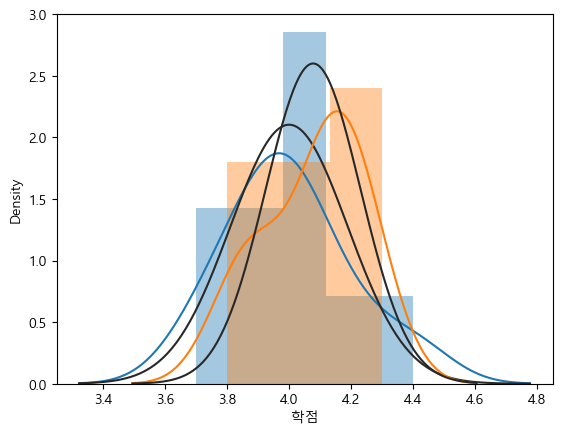

In [177]:
sns.distplot(scor1, fit=stats.norm)
sns.distplot(scor2, fit=stats.norm)
plt.show()

In [186]:
### 등분산성 검증
# - 귀무가설 : 두 집단간 분산이 동일하다 (p-value >= 0.05)
# - 대립가설 : 두 집단간 분산이 동일하지않다

# 등분산성 검증 방법
# 1. levene(레빈) 방법
# 2. fligner(플리그너) 방법
# 3. bartlett(바틀렛) 방법

In [196]:
# levene(레빈) 방법
sLevene = stats.levene(scor1, scor2)

print('등분산성 levene 검증결과 = ', sLevene)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(sLevene))

# 1. p-value = 0.742 => 0.05 이므로 귀무가설 채택
# 2. 귀무가설 채택 : 두 집단간 등분산성 만족

등분산성 levene 검증결과 =  LeveneResult(statistic=0.11149825783972156, pvalue=0.7423035272233627)
t-검정 통계량 = 0.111, p-value = 0.742


In [195]:
# fligner(플리그너) 방법
sFligner = stats.fligner(scor1, scor2)

print('등분산성 levene 검증결과 = ', sFligner)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(sFligner))

# 1. p-value = 0.923 => 0.05 이므로 귀무가설 채택
# 2. 귀무가설 채택 : 두 집단간 등분산성 만족

등분산성 levene 검증결과 =  FlignerResult(statistic=0.009351524793910174, pvalue=0.9229620332079382)
t-검정 통계량 = 0.009, p-value = 0.923


In [197]:
# bartlett(바틀렛) 방법
sBartlett = stats.bartlett(scor1, scor2)

print('등분산성 levene 검증결과 = ', sBartlett)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(sBartlett))

# 1. p-value = 0.537 => 0.05 이므로 귀무가설 채택
# 2. 귀무가설 채택 : 두 집단간 등분산성 만족

등분산성 levene 검증결과 =  BartlettResult(statistic=0.38065029633127184, pvalue=0.5372554141124455)
t-검정 통계량 = 0.381, p-value = 0.537


In [160]:
# 검정하기
# 첫번째 그룹 : 기준집단
# 두번째 그룹 : 관측집단
tResult_score = stats.ttest_ind(scor1, scor2)

print('한 집단 평균 검정(단일 표본검정) =', tResult_score)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(tResult_score))

# 1. p-value = 0.339 => 0.05 이므로 귀무가설 채택
# 2. 귀무가설 채택 : 한개의 집단과 관측값의 평균은 서로 같다.
#                    두 교육방법의 학점 평균에는 차이가 없다.

한 집단 평균 검정(단일 표본검정) = Ttest_indResult(statistic=-0.9561271382392642, pvalue=0.3516741458629946)
t-검정 통계량 = -0.956, p-value = 0.352


In [199]:
# 검정하기
# 첫번째 그룹 : 기준집단
# 두번째 그룹 : 관측집단

# equal_var 정규성과 등분산성을 모두 만족하는 경우 작성
tResult_score = stats.ttest_ind(scor1, scor2, equal_var= True)

print('한 집단 평균 검정(단일 표본검정) =', tResult_score)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(tResult_score))

# 1. p-value = 0.339 => 0.05 이므로 귀무가설 채택
# 2. 귀무가설 채택 : 한개의 집단과 관측값의 평균은 서로 같다.
#                    두 교육방법의 학점 평균에는 차이가 없다.

한 집단 평균 검정(단일 표본검정) = Ttest_indResult(statistic=-0.9561271382392642, pvalue=0.3516741458629946)
t-검정 통계량 = -0.956, p-value = 0.352


### 예시 4 - 음식점의 매출자료와 날씨자료를 이용하여 강수 여부에따른 매출 차이 분석
#### - 집단1 : 비가 올때의 매출
#### - 집단2 : 비가 안올때의 매출
- 귀무가설 : 강수여부에 따른 매출액 평균에 차이가 없다
- 대립가설 : 강수여부에 따른 매출액 평균에 차이가 있다

In [230]:
sale = pd.read_csv('./data/tsales.csv')

In [278]:
# 불러올때 형식 변환하기
# sale = pd.read_csv('./data/tsales.csv', dtype={'YMD' : 'object'})

In [227]:
weather = pd.read_csv('./data/tweather.csv')

In [280]:
sale['YMD'] = sale['YMD'].astype(str)
sale['YMD'] = pd.to_datetime(sale['YMD'])
sale = sale[['YMD','AMT']]

In [281]:
sale

,YMD,AMT
0,2019-05-14,0
1,2019-05-19,18000
2,2019-05-21,50000
3,2019-05-22,125000
4,2019-05-23,222500
...,...,...
323,2020-04-24,1092500
324,2020-04-25,672500
325,2020-04-26,1123500
326,2020-04-27,819500


In [251]:
weather['YMD'] = pd.to_datetime(weather['tm'])
weather = weather[['YMD','sumRn']]

In [284]:
weather

,YMD,sumRn
0,2018-06-01,0.0
1,2018-06-02,0.0
2,2018-06-03,0.0
3,2018-06-04,0.0
4,2018-06-05,0.0
...,...,...
697,2020-04-28,0.0
698,2020-04-29,0.0
699,2020-04-30,0.0
700,2020-05-01,0.0


In [294]:
sale_weather = pd.merge(sale, weather, how='left', left_on='YMD', right_on='YMD')
sale_weather

,YMD,AMT,sumRn
0,2019-05-14,0,0.0
1,2019-05-19,18000,22.0
2,2019-05-21,50000,0.0
3,2019-05-22,125000,0.0
4,2019-05-23,222500,0.0
...,...,...,...
323,2020-04-24,1092500,0.0
324,2020-04-25,672500,0.0
325,2020-04-26,1123500,0.0
326,2020-04-27,819500,0.0


In [261]:
rain = sale_weather[sale_weather['sumRn'] != 0]
rain = rain['AMT']

In [260]:
sunny = sale_weather[sale_weather['sumRn'] == 0]
sunny = sunny['AMT']

In [277]:
# 정규성 검정
# 검증시 대부분의 집단은 정규분포를 따른다는 가정하에 진행
# p-value의 값이 커질 수록, 평균의 분포는 정규분포를 따른다

rainSh = stats.shapiro(rain)
print('정규성 검정 결과 =', rainSh)
print('검정 통계량 = %.3f, p-value = %.3f' %(rainSh))

# 1. p-value = 0.883 >= 0.05 이므로 정규성을 만족한다

정규성 검정 결과 = ShapiroResult(statistic=0.9924222826957703, pvalue=0.882739782333374)
검정 통계량 = 0.992, p-value = 0.883


In [266]:
# 정규성 검정
# 검증시 대부분의 집단은 정규분포를 따른다는 가정하에 진행
# p-value의 값이 커질 수록, 평균의 분포는 정규분포를 따른다

sunnySh = stats.shapiro(sunny)
print('정규성 검정 결과 =', sunnySh)
print('검정 통계량 = %.3f, p-value = %.3f' %(sunnySh))

# 1. p-value = 0.056 >= 0.05 이므로 정규성을 만족한다

정규성 검정 결과 = ShapiroResult(statistic=0.9884955883026123, pvalue=0.056049469858407974)
검정 통계량 = 0.988, p-value = 0.056


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


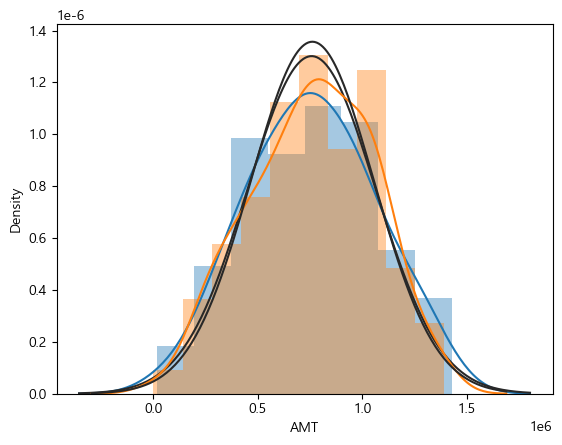

In [267]:
sns.distplot(rain, fit=stats.norm)
sns.distplot(sunny, fit=stats.norm)
plt.show()

In [271]:
# levene(레빈) 방법
sLevene = stats.levene(rain, sunny)

print('등분산성 levene 검증결과 = ', sLevene)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(sLevene))

# 1. p-value = 0.712 => 0.05 이므로 귀무가설 채택
# 2. 귀무가설 채택 : 두 집단간 등분산성 만족

등분산성 levene 검증결과 =  LeveneResult(statistic=0.13618283405945808, pvalue=0.7123452333011173)
t-검정 통계량 = 0.136, p-value = 0.712


In [273]:
# fligner(플리그너) 방법
sFligner = stats.fligner(rain, sunny)

print('등분산성 levene 검증결과 = ', sFligner)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(sFligner))

# 1. p-value = 0.705 => 0.05 이므로 귀무가설 채택
# 2. 귀무가설 채택 : 두 집단간 등분산성 만족

등분산성 levene 검증결과 =  FlignerResult(statistic=0.1433080993606402, pvalue=0.7050142128066071)
t-검정 통계량 = 0.143, p-value = 0.705


In [274]:
# bartlett(바틀렛) 방법
sBartlett = stats.bartlett(rain, sunny)

print('등분산성 levene 검증결과 = ', sBartlett)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(sBartlett))

# 1. p-value = 0.604 => 0.05 이므로 귀무가설 채택
# 2. 귀무가설 채택 : 두 집단간 등분산성 만족

등분산성 levene 검증결과 =  BartlettResult(statistic=0.2688957613342281, pvalue=0.6040734684690022)
t-검정 통계량 = 0.269, p-value = 0.604


In [276]:
# 검정하기
# 첫번째 그룹 : 기준집단
# 두번째 그룹 : 관측집단
tResult_sale = stats.ttest_ind(rain, sunny, equal_var= True)

print('한 집단 평균 검정(단일 표본검정) =', tResult_sale)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(tResult_sale))

# 1. p-value = 0.920 => 0.05 이므로 귀무가설 채택
# 2. 귀무가설 채택 : 한개의 집단과 관측값의 평균은 서로 같다.
#                    강수 여부에 따른 매출액 차이가 없다.

한 집단 평균 검정(단일 표본검정) = Ttest_indResult(statistic=-0.10109828602924716, pvalue=0.919534587722196)
t-검정 통계량 = -0.101, p-value = 0.920


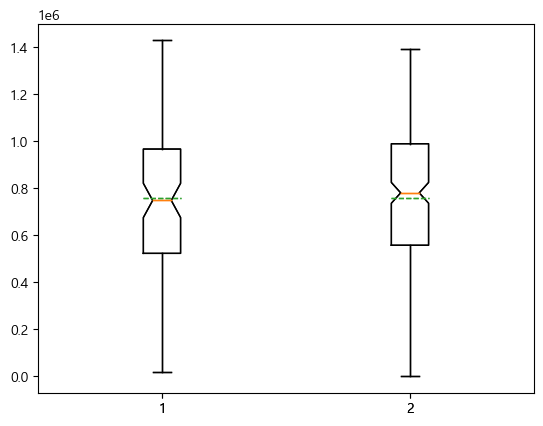

In [296]:
plt.boxplot([rain,sunny],
            meanline= True,
            showmeans= True,
            notch = True)
plt.show()